# EDA in the final datset

## importing data

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#importing datset
df = pd.read_csv(r"E:\major_project\datasets\final_pass_dataset.csv")

In [5]:
#basic overview of dataset
df.head()

,password,strength,length,lowercase_count,uppercase_count,digit_count,special_count,entropy,transitions,max_repeat,leet_count,is_common_root,shape_complexity,pattern_intensity,habit_score,char_diversity
0,123456,0,6,0,0,6,0,2.584963,0,1,4,0,1,4,1,1
1,12345,0,5,0,0,5,0,2.321928,0,1,4,0,1,3,1,1
2,123456789,0,9,0,0,9,0,3.169925,0,1,5,0,1,7,1,1
3,password,0,8,8,0,0,0,2.750000,0,2,0,1,1,0,0,1
4,iloveyou,0,8,8,0,0,0,2.750000,0,1,0,1,1,0,0,1


In [6]:
df.describe()

,strength,length,lowercase_count,uppercase_count,digit_count,special_count,entropy,transitions,max_repeat,leet_count,is_common_root,shape_complexity,pattern_intensity,habit_score,char_diversity
count,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000,439396.000000
mean,0.908076,9.710810,6.025494,0.561384,2.925018,0.198914,2.743262,1.001705,1.453363,1.867541,0.002847,2.211793,0.092723,0.702717,1.658499
std,0.732556,3.422982,4.496729,1.935635,3.414986,1.306544,0.510891,1.679571,1.218865,2.294049,0.053282,1.231234,0.445008,0.658965,0.640232
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,2.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,9.000000,6.000000,0.000000,2.000000,0.000000,2.750000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000
75%,1.000000,11.000000,9.000000,0.000000,4.000000,0.000000,3.095795,1.000000,2.000000,3.000000,0.000000,3.000000,0.000000,1.000000,2.000000
max,2.000000,50.000000,50.000000,41.000000,50.000000,50.000000,4.937500,49.000000,50.000000,50.000000,1.000000,12.000000,26.000000,3.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439396 entries, 0 to 439395
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   password           439396 non-null  object 
 1   strength           439396 non-null  int64  
 2   length             439396 non-null  int64  
 3   lowercase_count    439396 non-null  int64  
 4   uppercase_count    439396 non-null  int64  
 5   digit_count        439396 non-null  int64  
 6   special_count      439396 non-null  int64  
 7   entropy            439396 non-null  float64
 8   transitions        439396 non-null  int64  
 9   max_repeat         439396 non-null  int64  
 10  leet_count         439396 non-null  int64  
 11  is_common_root     439396 non-null  int64  
 12  shape_complexity   439396 non-null  int64  
 13  pattern_intensity  439396 non-null  int64  
 14  habit_score        439396 non-null  int64  
 15  char_diversity     439396 non-null  int64  
dtypes:

Text(0.5, 1.0, 'Password Strength Distribution')

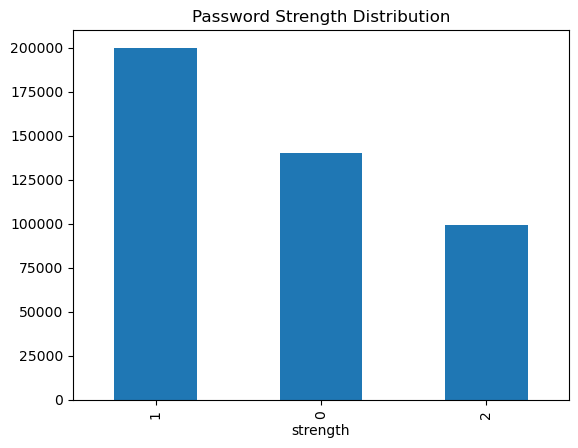

In [8]:
#checking the password strength distribution
df['strength'].value_counts().plot(kind='bar')
plt.title('Password Strength Distribution')

Here, we can see that the dataset isnt actually balanced, but has sufficient data for each field. It is so because when the datset was made, the data was distributed across five strength levels, but then consolidated into three for better results.

In [9]:
categorical_columns = df.select_dtypes(include = ['category','object']).columns
numerical_columns = df.select_dtypes(exclude = ['category','object']).columns

## heatmap for correlation

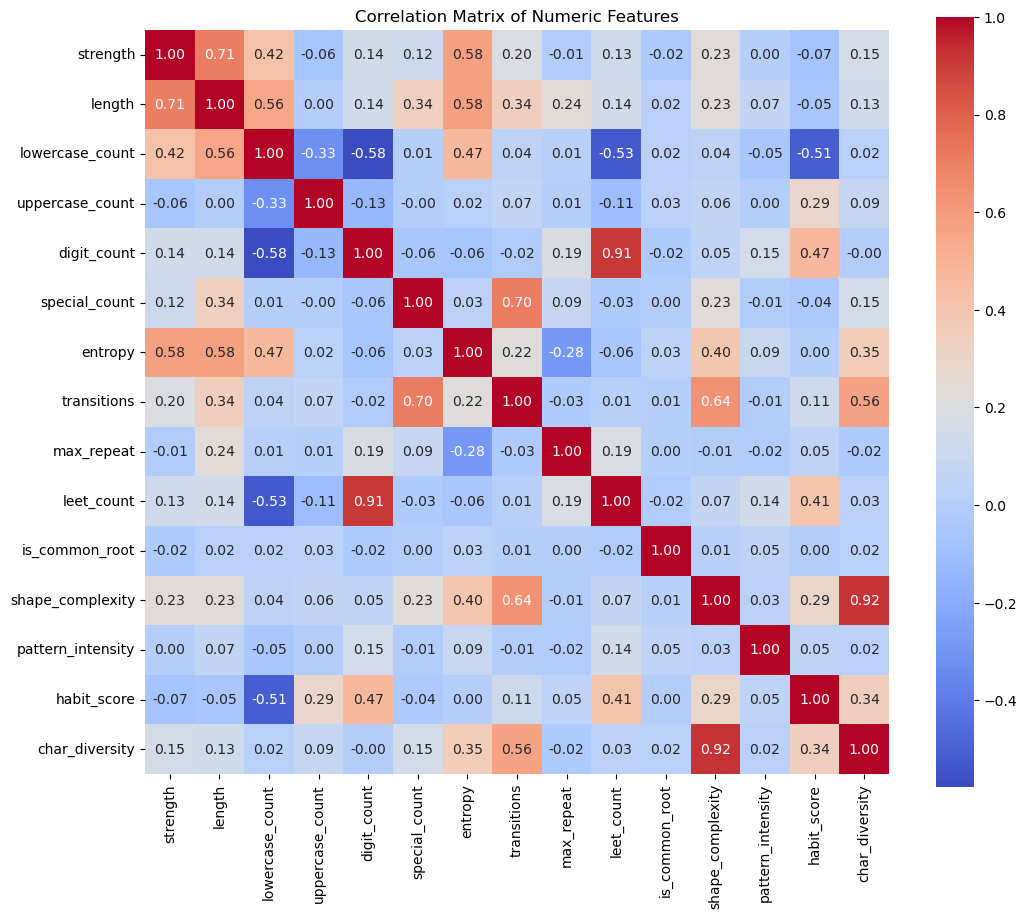

In [10]:
#taking data from required columns
numeric_data = df[numerical_columns]

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


from the heatmap, we can see that the highest correlation factors come from length, entropy and lowercase_count. Shape complexity and transistions is also correlated, although it is slightly weaker. The main reason for strong correlation factor may likely be due to as length increases, complexity increases, and most users type password in lowercase. Entropy will capture the randomness and will hence be correlated higly. Supirsingly, uppercase_count is negatively correlated ( abit weeakly) maybe due to the first letter being capital while typing.

## feature distribution anaylsis

We check skewness by plotting histograms

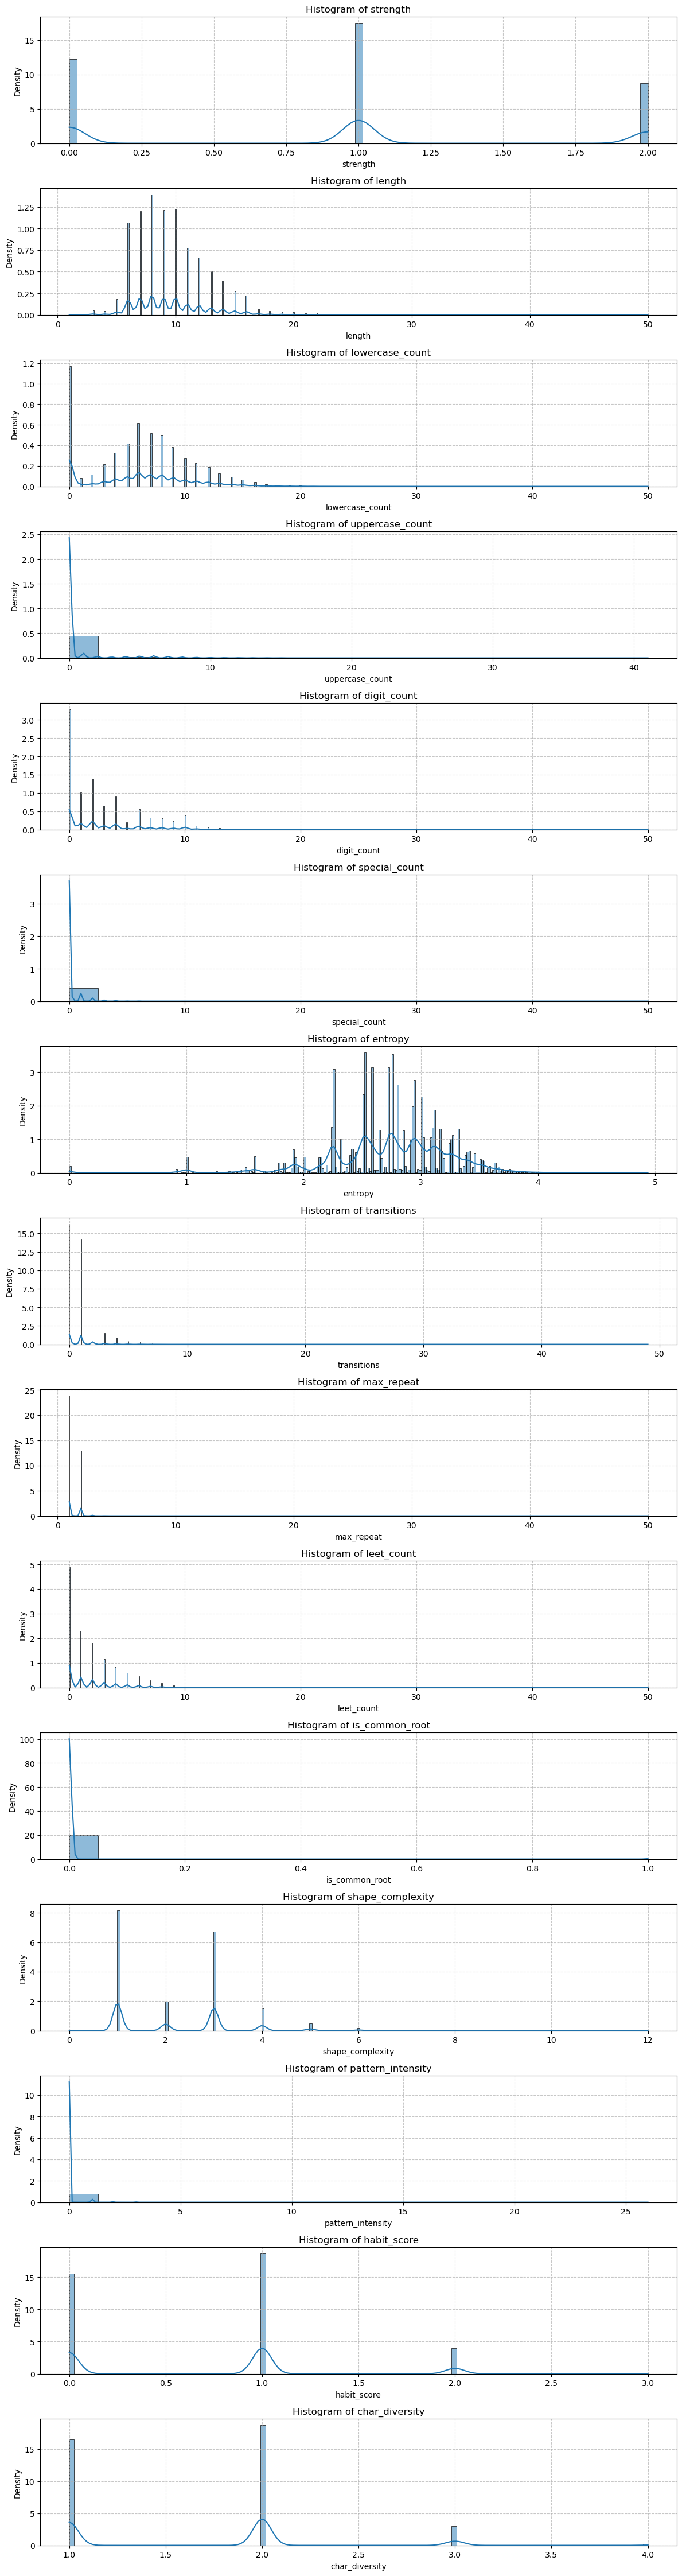

In [11]:
#histograms for all numeric features
# Create a figure and axes for subplots
num_cols = len(numerical_columns)

fig, axes = plt.subplots(num_cols, 1, figsize=(12, num_cols * 3))

# If only one column, axes won't be an array 
if num_cols == 1:
    axes = [axes]

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], stat='density', linewidth=0.5)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


Most numerical password features are right-skewed, indicating that users predominantly choose simple passwords with short lengths, few special characters, and  categorical features like strength appear as pillars due to their discrete nature. Entropy exhibits a multimodal, non-normal distribution with several local peaks, reflecting different human password patterns (dictionary-like, mixed-case, or fully random). Some features span large numeric ranges but still cluster in small intervals, indicating that while long or complex passwords exist, they are relatively rare.

## detecting outliers

in the dataset we are working on, since input of wrong data (such as in height and temperature) is highly unlikely and will more represent the real world. 
Thus, we will detect them for normalizations

In [12]:
numerical_df = df[numerical_columns]

#function for outlier
def detect_outliers(data):
    #an empty dictionary for printing the summary
    outlier_summary={}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        outliers= data[(data[col] < lower) | (data[col] > upper) ]
        outlier_summary[col] ={
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower_Bound": lower,
            "Upper_Bound": upper,
            "Outlier_Count": outliers.shape[0],
            "Outlier_Percentage": round((outliers.shape[0] / len(data))*100, 2)
        }
    return pd.DataFrame(outlier_summary).T

#calling function
outlier_report = detect_outliers(numerical_df)
print(outlier_report)
            


                    Q1         Q3       IQR  Lower_Bound  Upper_Bound  \
strength           0.0   1.000000  1.000000    -1.500000     2.500000   
length             7.0  11.000000  4.000000     1.000000    17.000000   
lowercase_count    2.0   9.000000  7.000000    -8.500000    19.500000   
uppercase_count    0.0   0.000000  0.000000     0.000000     0.000000   
digit_count        0.0   4.000000  4.000000    -6.000000    10.000000   
special_count      0.0   0.000000  0.000000     0.000000     0.000000   
entropy            2.5   3.095795  0.595795     1.606307     3.989488   
transitions        0.0   1.000000  1.000000    -1.500000     2.500000   
max_repeat         1.0   2.000000  1.000000    -0.500000     3.500000   
leet_count         0.0   3.000000  3.000000    -4.500000     7.500000   
is_common_root     0.0   0.000000  0.000000     0.000000     0.000000   
shape_complexity   1.0   3.000000  2.000000    -2.000000     6.000000   
pattern_intensity  0.0   0.000000  0.000000     0.0

<Figure size 1400x600 with 0 Axes>

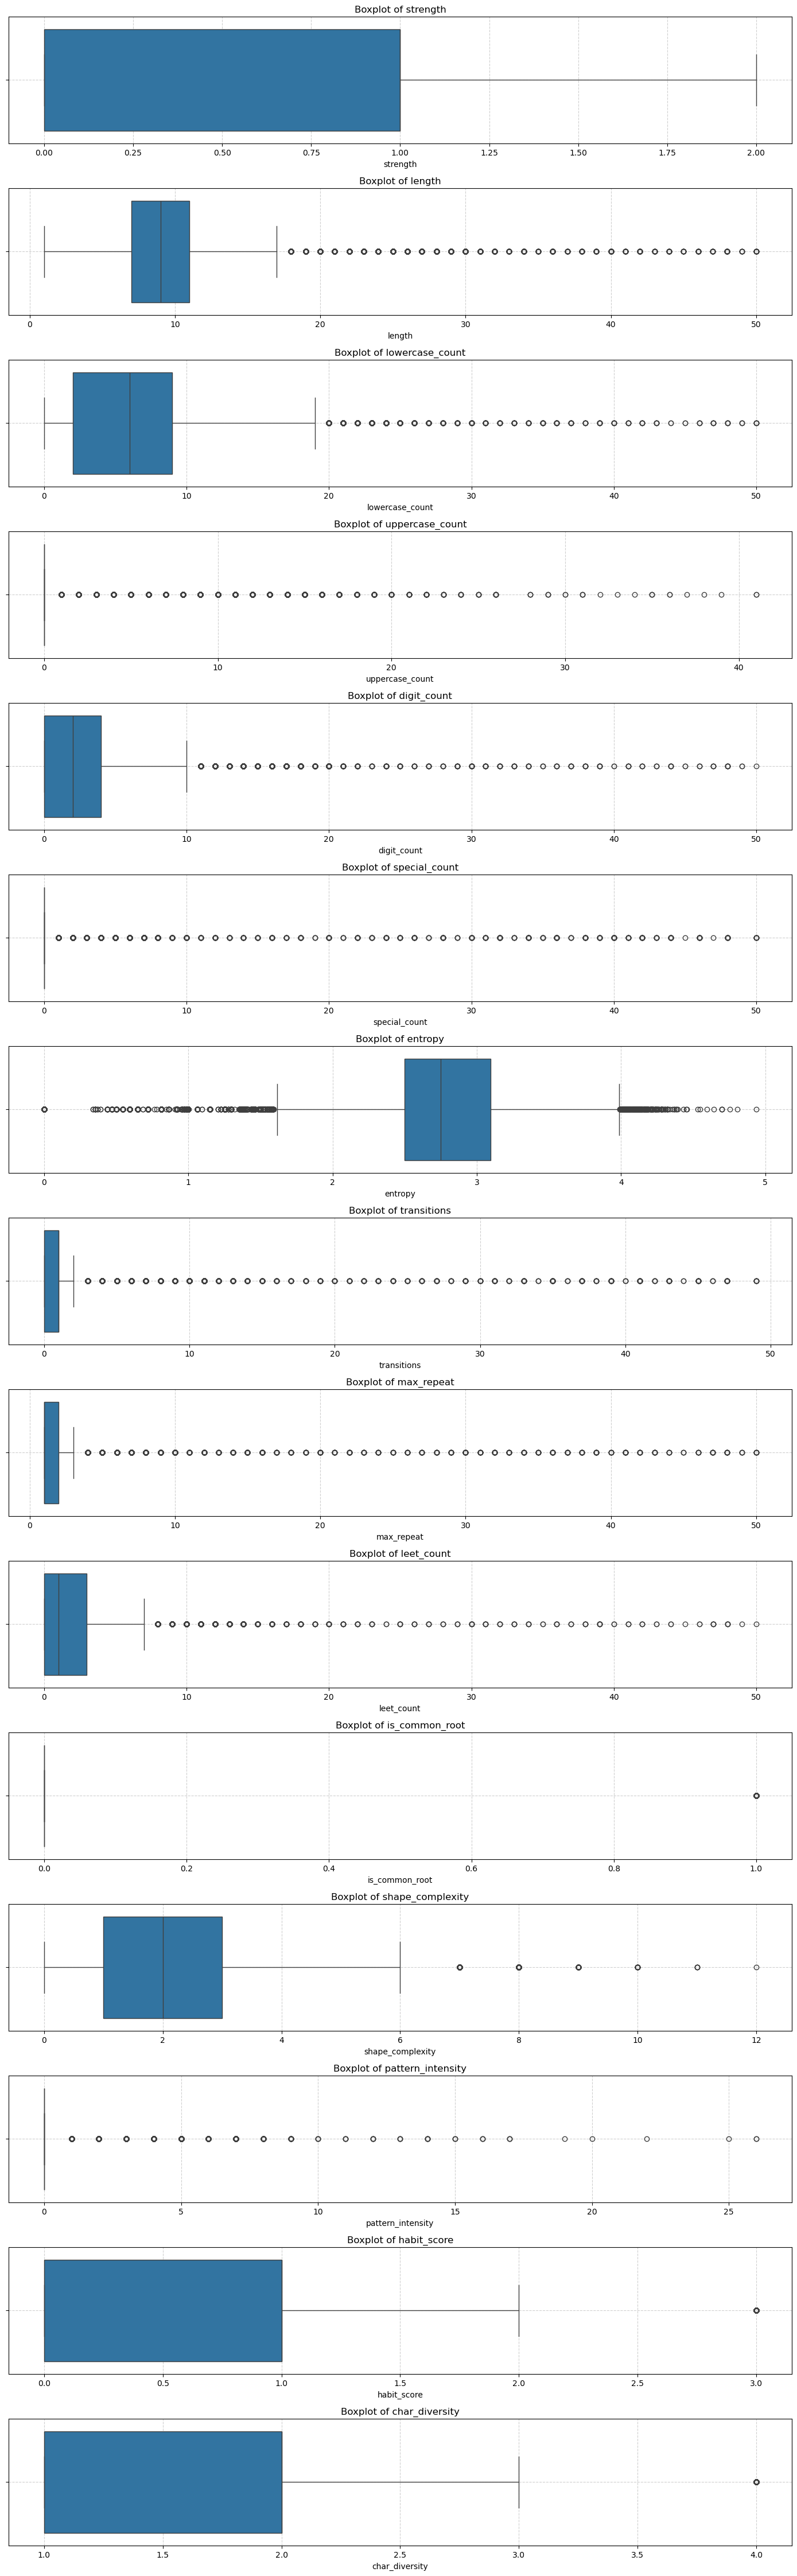

In [13]:
#box plot visualization
plt.figure(figsize=(14, 6))
num_cols = len(numerical_df.columns)

fig, axes = plt.subplots(num_cols, 1, figsize=(14, num_cols * 3))

for i, col in enumerate(numerical_df.columns):
    sns.boxplot(x=numerical_df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


## box plot for target variable

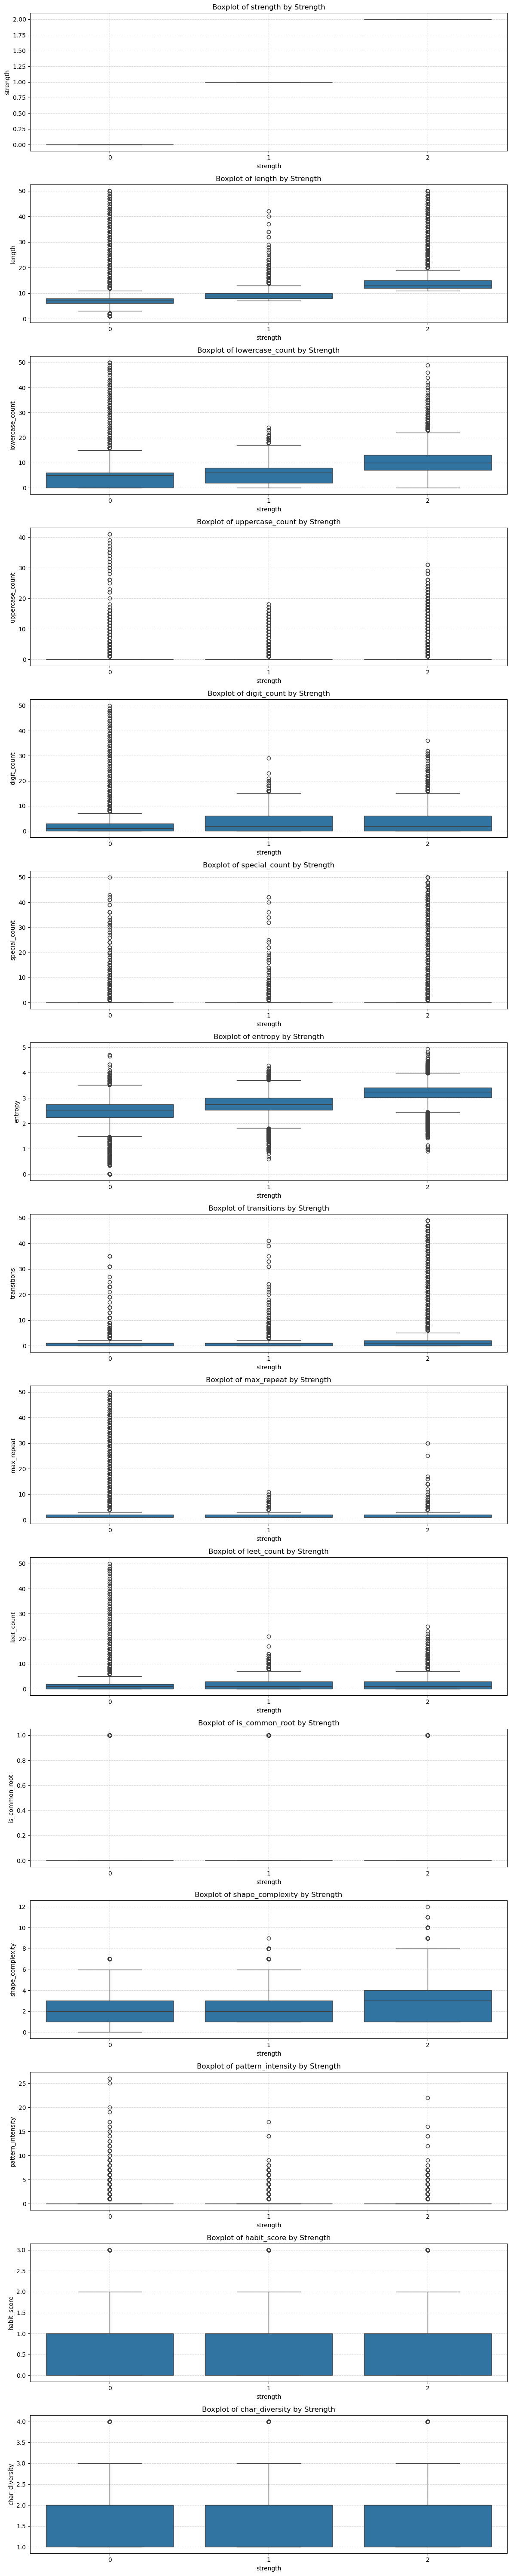

In [14]:

fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(12, len(numerical_columns)*4))

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x='strength', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Strength')
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## Anova and Kruskal-Wallis Test

In [15]:
# importing library
from scipy.stats import f_oneway
from scipy.stats import kruskal

In [17]:
#anova test
anova_results = {}

for col in numerical_columns:
    groups = [
        df[df['strength'] == s][col]
        for s in sorted(df['strength'].unique())
    ]
    f_stat, p_val = f_oneway(*groups)
    anova_results[col] = p_val

anova_df = (
    pd.DataFrame.from_dict(anova_results, orient='index', columns=['anova_pvalue'])
    .sort_values('anova_pvalue')
)

anova_df

e:\python\anaconda\installed\envs\password_project\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,anova_pvalue
strength,0.000000e+00
length,0.000000e+00
lowercase_count,0.000000e+00
uppercase_count,0.000000e+00
digit_count,0.000000e+00
special_count,0.000000e+00
entropy,0.000000e+00
transitions,0.000000e+00
leet_count,0.000000e+00
shape_complexity,0.000000e+00


In [18]:
#kruskal test
kruskal_results = {}

for col in numerical_columns:
    groups = [
        df[df['strength'] == s][col]
        for s in sorted(df['strength'].unique())
    ]
    stat, p_val = kruskal(*groups)
    kruskal_results[col] = p_val

kruskal_df = (
    pd.DataFrame.from_dict(kruskal_results, orient='index', columns=['kruskal_pvalue'])
    .sort_values('kruskal_pvalue')
)

kruskal_df

,kruskal_pvalue
strength,0.000000e+00
length,0.000000e+00
lowercase_count,0.000000e+00
uppercase_count,0.000000e+00
digit_count,0.000000e+00
special_count,0.000000e+00
entropy,0.000000e+00
transitions,0.000000e+00
max_repeat,0.000000e+00
leet_count,0.000000e+00
